In [4]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from analytics_combined import *
import pandas as pd
from scipy.stats import gaussian_kde
#import datashader as ds
#from datashader.mpl_ext import dsshow
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [5]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

In [6]:

#Run this before anything else!

input_file_proj_17 = "../data/tile_placements_proj.csv"
input_file_proj_22 = "/home/yw180/place/data_2022/tile_placements_proj.csv"
input_file_proj_23 = "/home/yw180/place/data_2023/sorted_tile_placements_proj.csv"

# tile_placement_17 = "../data/tile_placements_no_duplicates.csv"
# tile_placement_23 = "/home/yw180/place/data_2023/tile_placements_no_duplicates.csv"
# tile_placement_22 = "/home/yw180/place/data_2022/tile_placements_no_duplicates.csv"

projects_to_remove = {}
js_filename = "../data/atlas.json"
js_filename_17 = "../data/atlas_complete.json"
js_filename_22 = "/home/yw180/place/data_2022/atlas/atlas.json"
js_filename_23 = "/home/yw180/place/data_2023/atlas/atlas.json"

# locations_17 = store_locations(js_filename_17)
# locations_22 = store_locations_22(js_filename_22)
# locations_23 = store_locations_22(js_filename_23)

names_17, descriptions_17 = read_picture_names_and_descriptions_17(js_filename_17)
names_22, descriptions_22 = read_picture_names_and_descriptions(js_filename_22)
names_23, descriptions_23 = read_picture_names_and_descriptions(js_filename_23)

#  2017

In [7]:
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_proj_17 = pixels_per_project(input_file_proj_17, projects_to_remove)

In [8]:
#Computing updates per project
updates_proj_17, total_updates_17 = updates_per_project(input_file_proj_17, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates_17, total_tile_updates_17 = update_category_per_project()

print("total updates:", total_updates_17)

total updates: 21390439


In [9]:
#Updates vs. Pixels 
X_17,Y_17 = Create_Array(pixels_proj_17,updates_proj_17)


#Updates vs. pixels: ratio and ID
ratios_17, IDs = Ratio(pixels_proj_17, updates_proj_17, names_17)

In [10]:
sorted_ratios_17 = sorted(ratios_17.items(), key=operator.itemgetter(1), reverse=True)

In [11]:
#Correlation
np.corrcoef(X_17, Y_17)

array([[1.        , 0.87006244],
       [0.87006244, 1.        ]])

/home/yw180/.conda/envs/yw180/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/yw180/.conda/envs/yw180/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


slope: 1.0840323315585643


<Figure size 640x480 with 0 Axes>

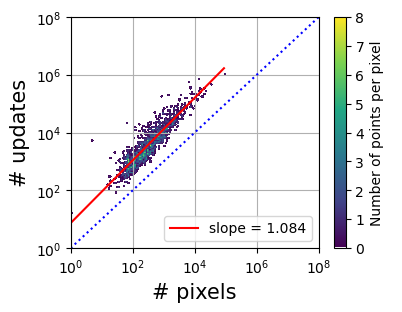

In [12]:
from matplotlib.ticker import ScalarFormatter
#Inverse cumulative density funcition

%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name, col, lab):
    white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)
#    xy = np.vstack([X,Y])
#    z = gaussian_kde(xy)(xy)
#    idx = z.argsort()
#    x, y, z = X[idx], Y[idx], z[idx]
    plt.clf()
    fig = plt.figure(figsize=(4,3))
    ax = plt.subplot(111,projection='scatter_density')    
    density = ax.scatter_density(X, Y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')
    logx = np.log(X)
    logy = np.log(Y)
    coeffs = np.polyfit(logx,logy,1)
    poly = np.poly1d(coeffs)
    yfit = lambda X: np.exp(poly(np.log(X)))
    plt.loglog(np.unique(X),yfit(np.unique(X)), color='red',label = "slope = " + str(round(coeffs[0], 3)))
    ax.axline((1, 1),  (10, 10  ), color="blue", linestyle=":")

    ax.set_ylabel('# updates', fontsize=15)
    #ax.tick_params(labelsize=10)
    ax.set_xlabel('# pixels', fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1,10**8])
    ax.set_ylim([1,10**8])
#     ax.set_xticks(logx)
#     ax.set_aspect('equal', 'box')
    ax.legend(loc = 'lower right')
    ax.grid()
#     plt.axis('square')
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    return coeffs[0]


slope = plot_updates_vs_pixels(X_17, Y_17, "../plots/plot_updates_vs_pixels.svg", "#fa4d56", "2017")
print("slope:", slope)

<Figure size 640x480 with 0 Axes>

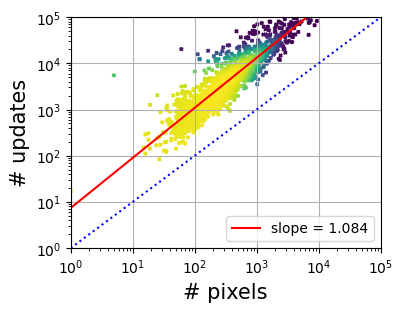

In [13]:
def plot_updates_vs_pixels_no_color(X, Y, output_file_name):
    XY = np.vstack([X,Y])
    z = gaussian_kde(XY)(XY)
    idx = z.argsort()
    x, y, z = X[idx], Y[idx], z[idx]
    plt.clf()
    fig = plt.figure(figsize=(4,3))
    ax = plt.subplot(111) 
    ax.scatter(x, y, c = z, marker='x', s=5)
    
    logx = np.log(X)
    logy = np.log(Y)
    coeffs = np.polyfit(logx,logy,1)
    poly = np.poly1d(coeffs)
    yfit = lambda X: np.exp(poly(np.log(X)))
    plt.loglog(np.unique(X),yfit(np.unique(X)), color='red',label = "slope = " + str(round(coeffs[0], 3)))
    ax.axline((1, 1),  (10, 10  ), color="blue", linestyle=":")
    
    ax.set_ylabel('# updates', fontsize=15)
    #ax.tick_params(labelsize=10)
    ax.set_xlabel('# pixels', fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1,10**5])
    ax.set_ylim([1,10**5])
    ax.legend(loc = 'lower right')
    ax.grid()
#     plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
plot_updates_vs_pixels_no_color(X_17, Y_17, None)    

# 2022

In [15]:
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_proj_22 = pixels_per_project(input_file_proj_22, projects_to_remove)
#Computing updates per project
updates_proj_22, total_updates_22 = updates_per_project(input_file_proj_22, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates_22, total_tile_updates_22 = update_category_per_project_22(1648835050,1649135640,input_file_proj_22)

print("total updates:", total_updates_22)

total updates: 293271894


In [16]:
#Updates vs. Pixels 
X_22,Y_22 = Create_Array(pixels_proj_22,updates_proj_22)


#Updates vs. pixels: ratio and ID
ratios_22, IDs = Ratio(pixels_proj_22,updates_proj_22, names_22)
sorted_ratios_22 = sorted(ratios_22.items(), key=operator.itemgetter(1), reverse=True)

In [17]:
#Correlation
np.corrcoef(X_22, Y_22)

array([[1.        , 0.73733477],
       [0.73733477, 1.        ]])

1.0063356992342116


<Figure size 640x480 with 0 Axes>

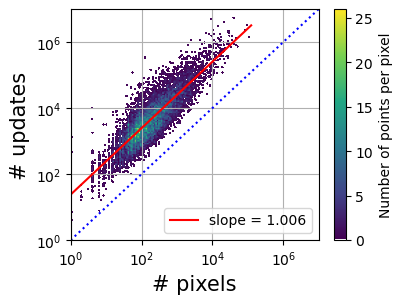

In [18]:
slope = plot_updates_vs_pixels(X_22, Y_22, "../plots/plot_updates_vs_pixels.svg", "#002d9c", "2022")
print(slope)

# 2023

In [20]:
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_proj_23 = pixels_per_project(input_file_proj_23, projects_to_remove)
#Computing updates per project
updates_proj_23, total_updates_23 = updates_per_project(input_file_proj_23, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates_23, total_tile_updates_23 = update_category_per_project_22(1689876100,1690339115, input_file_proj_23)

print("total updates:", total_updates_23)

total updates: 570239516


In [21]:
#Updates vs. Pixels 
X_23,Y_23 = Create_Array(pixels_proj_23,updates_proj_23)


#Updates vs. pixels: ratio and ID
ratios_23, IDs = Ratio(pixels_proj_23, updates_proj_23, names_23)
sorted_ratios_23 = sorted(ratios_23.items(), key=operator.itemgetter(1), reverse=True)

1.0115795115321642


<Figure size 640x480 with 0 Axes>

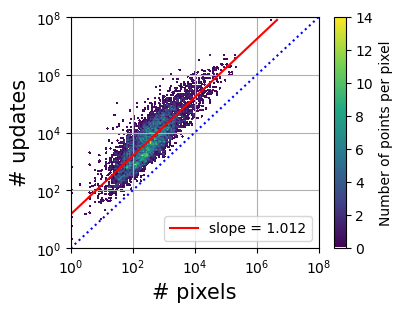

In [22]:
slope = plot_updates_vs_pixels(X_23, Y_23, "../plots/plot_updates_vs_pixels.svg", "#005d5d", "2023")
print(slope)